In [ ]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.1 MB/s eta 0:00:00


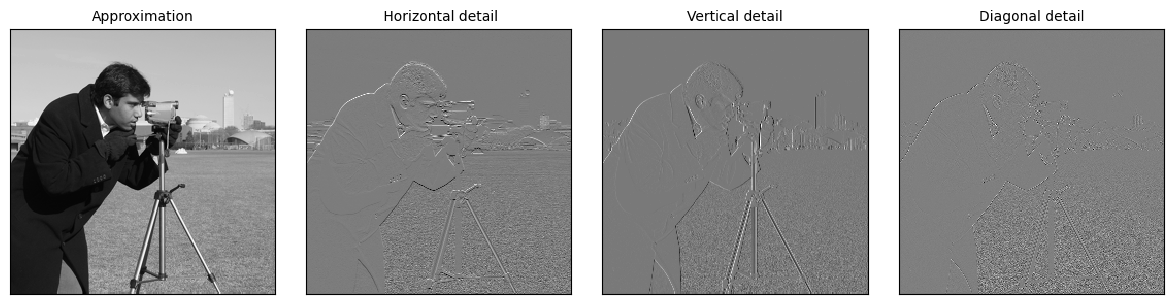

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

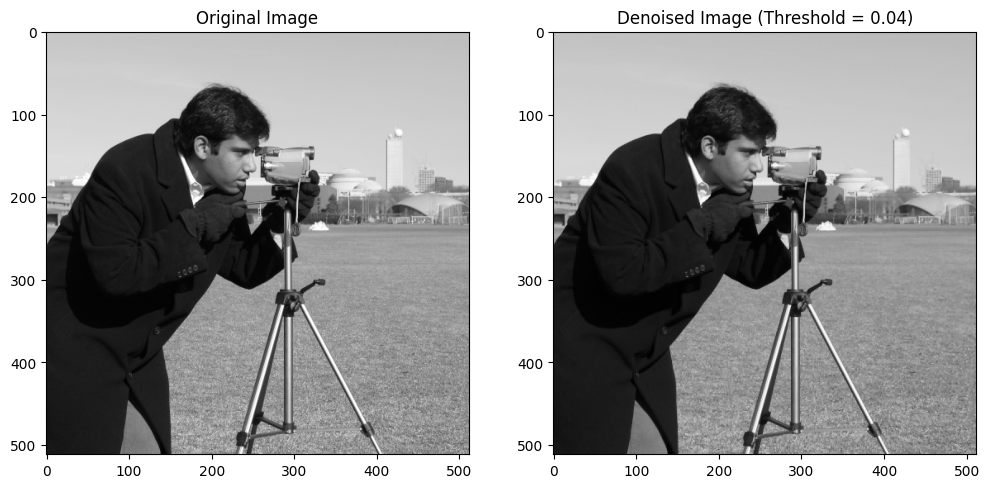

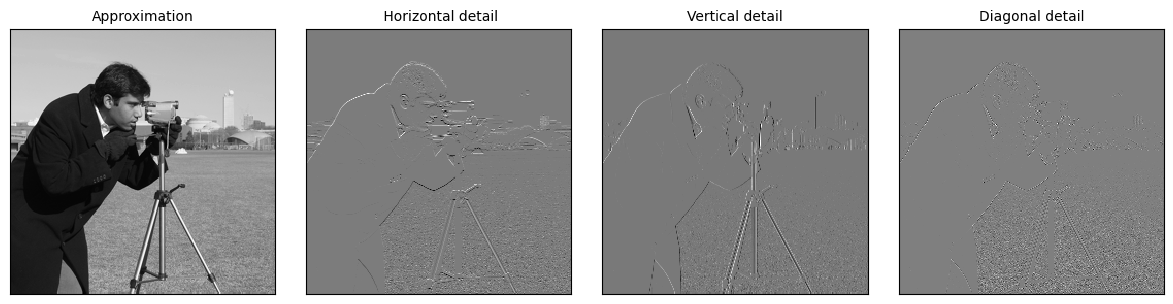

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2

# Noise removal by thresholding
threshold = 0.04  # Adjust this value for different noise levels
LH_thresholded = pywt.threshold(LH, threshold * np.max(LH))
HL_thresholded = pywt.threshold(HL, threshold * np.max(HL))
HH_thresholded = pywt.threshold(HH, threshold * np.max(HH))


# Reconstruct the image with the thresholded coefficients
coeffs2_thresholded = LL, (LH_thresholded, HL_thresholded, HH_thresholded)
denoised_image = pywt.idwt2(coeffs2_thresholded, 'bior1.3')

# Display original and denoised images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(denoised_image, cmap=plt.cm.gray)
axes[1].set_title('Denoised Image (Threshold = {})'.format(threshold))
plt.show()

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH_thresholded, HL_thresholded, HH_thresholded]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


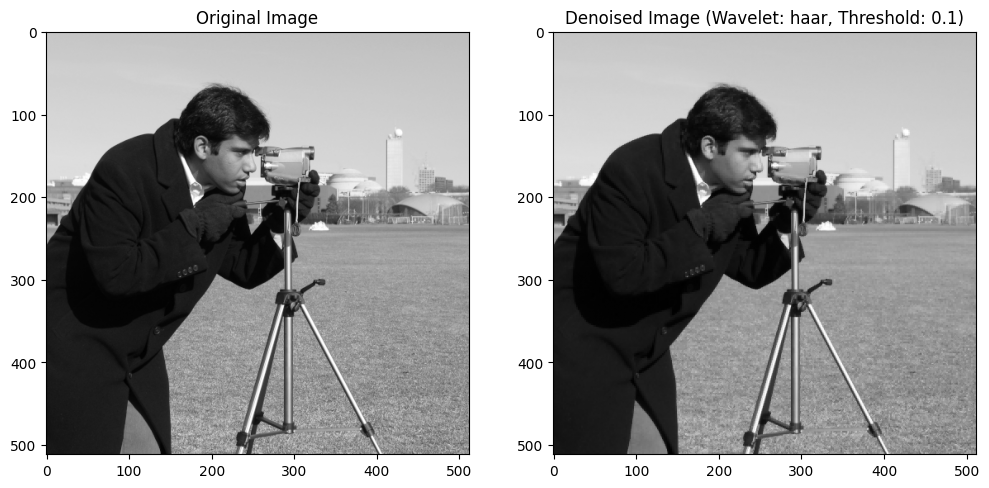

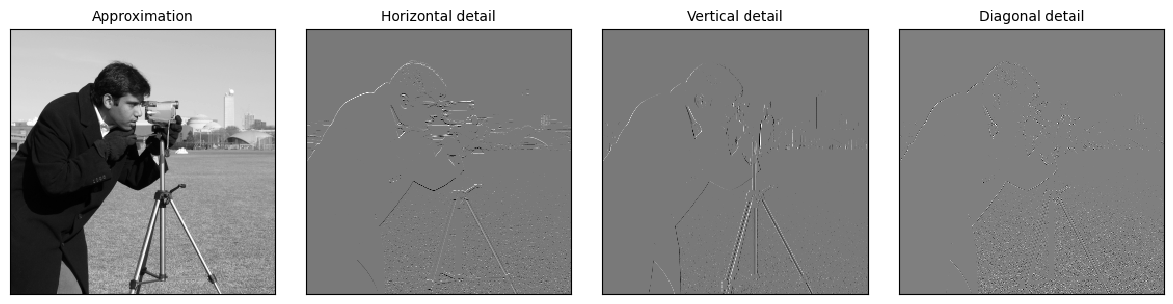

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

# Assuming 'original' image is already loaded as in the previous example:
# original = pywt.data.camera()

# Example with a different wavelet and different threshold
wavelet = 'haar'  # Using Haar wavelet
threshold = 0.1  # Example threshold

coeffs2 = pywt.dwt2(original, wavelet)
LL, (LH, HL, HH) = coeffs2

LH_thresholded = pywt.threshold(LH, threshold * np.max(LH))
HL_thresholded = pywt.threshold(HL, threshold * np.max(HL))
HH_thresholded = pywt.threshold(HH, threshold * np.max(HH))

coeffs2_thresholded = LL, (LH_thresholded, HL_thresholded, HH_thresholded)
denoised_image = pywt.idwt2(coeffs2_thresholded, wavelet)

# Display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(denoised_image, cmap=plt.cm.gray)
axes[1].set_title(f'Denoised Image (Wavelet: {wavelet}, Threshold: {threshold})')
plt.show()

# Display coefficients
titles = ['Approximation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH_thresholded, HL_thresholded, HH_thresholded]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
  ax.set_title(titles[i], fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving mri_tumor1.jpg to mri_tumor1.jpg


In [ ]:
img=cv2.imread('mri_tumor1.jpg',0)

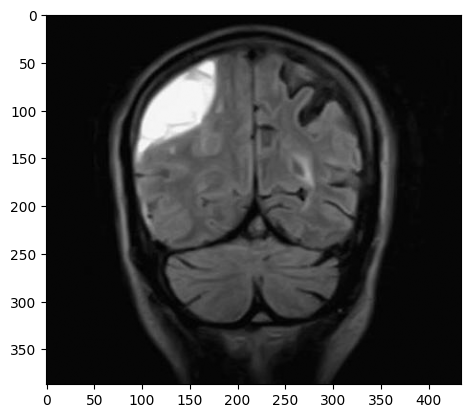

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
img>200

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

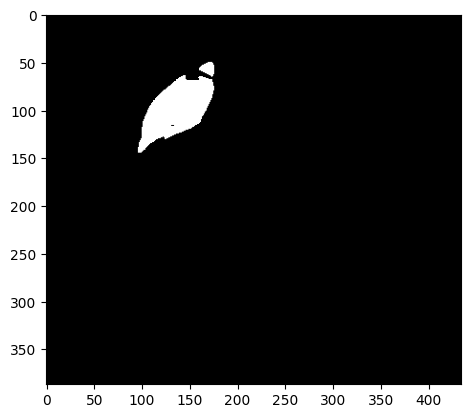

In [ ]:
img=cv2.imread('mri_tumor1.jpg',0)
img[img>200]=255
img[img<=200]=0
plt.imshow(img,cmap='gray')

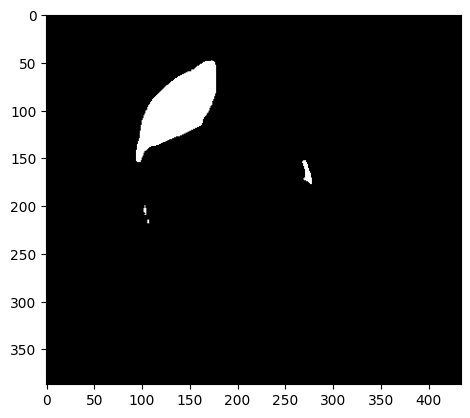

In [ ]:
img=cv2.imread('mri_tumor1.jpg',0)
img[img>140]=255
img[img<=140]=0
plt.imshow(img,cmap='gray')

In [ ]:
#Morphological Operations
#Dilation, Erosion, clear border, skeltenization, thickining, thinning, areaopen, closing

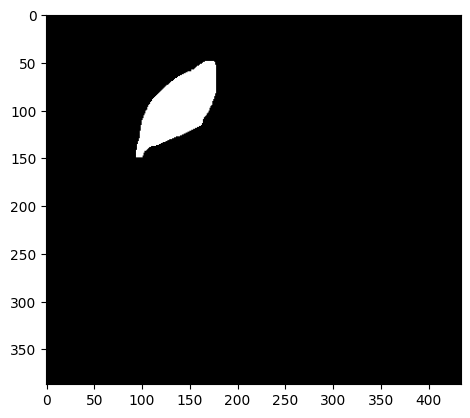

In [ ]:
se1=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
mask=cv2.morphologyEx(img,cv2.MORPH_OPEN,se1)
plt.imshow(mask,cmap='gray')

In [ ]:
mask==255

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
mask.max()

255

In [ ]:
#feature engineering
#calculate area
mask.max()
area=(mask==255).sum()
print("the area",area)

the area 4448


In [ ]:
area/(img.shape[0]*img.shape[1])*100


2.648281117898522

In [ ]:
length_height=(mask==255).sum(axis=0)


In [ ]:
length_width=(mask==255).sum(axis=1)

In [ ]:
length_height=(mask==255).sum(axis=0).max()
length_width=(mask==255).sum(axis=1).max()

In [ ]:
ecc=length_height/length_width
ecc

0.9848484848484849

In [ ]:
diameter = np.sqrt(4 * area / np.pi)
print("Diameter:", diameter)


Diameter: 75.25536190187384


perimeter of the tumor 366


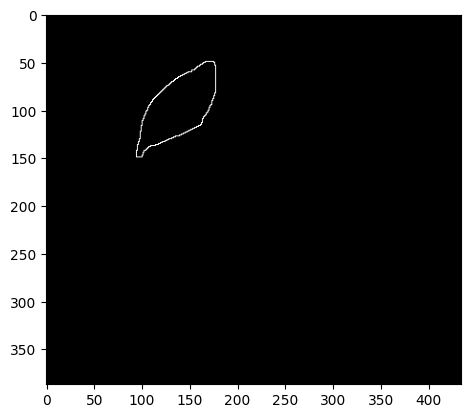

In [ ]:
# Permieter
import numpy as np
kernal=np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')
edge=cv2.filter2D(mask,-1,kernal)
plt.imshow(edge,cmap='gray')
peri=(edge==255).sum()
print("perimeter of the tumor",peri)